# Data Exploration

### Import Library

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Read Data

You can check out the notebook and the dataset on my GitHub repository

In [2]:
df = pd.read_csv('dataset/car_price.csv')

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<Figure size 864x576 with 0 Axes>

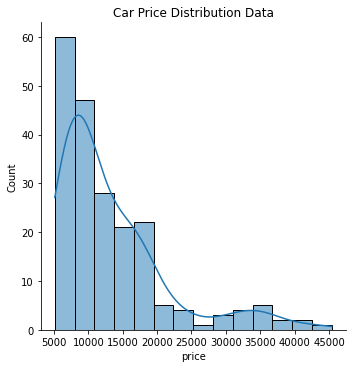

In [5]:
plt.figure(figsize=(12,8))
sns.displot(df['price'], kde=True)
plt.title('Car Price Distribution Data')
plt.show()

In [6]:
cat_var = df.loc[: , df.columns!='CarName'].select_dtypes(include=['object'])
cat_var.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [7]:
for i in cat_var:
    print('{a} : {b} '.format(a=i, b=df[i].unique()))
    print('{c}'.format(c=df[i].nunique()))

fueltype : ['gas' 'diesel'] 
2
aspiration : ['std' 'turbo'] 
2
doornumber : ['two' 'four'] 
2
carbody : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] 
5
drivewheel : ['rwd' 'fwd' '4wd'] 
3
enginelocation : ['front' 'rear'] 
2
enginetype : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv'] 
7
cylindernumber : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight'] 
7
fuelsystem : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi'] 
8


In [8]:
num_var = df.loc[: , df.columns!='CarName'].select_dtypes(include=['float','int64'])
num_var.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


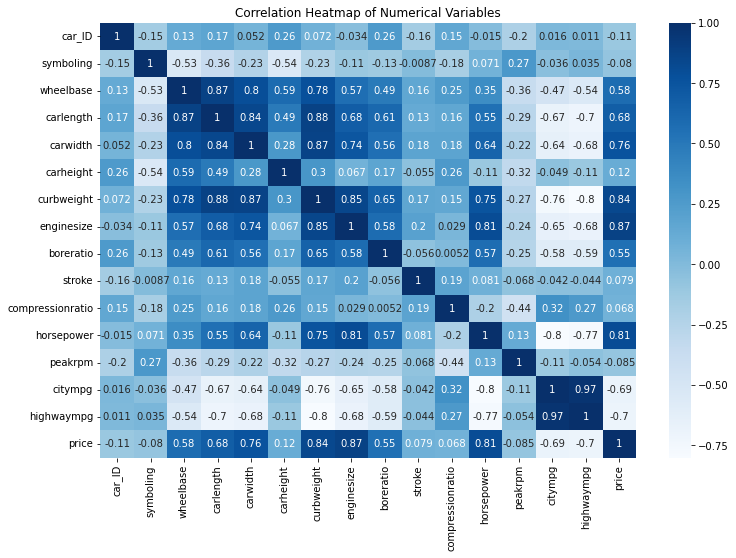

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(num_var.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# Simple Linear Regression

<Figure size 864x576 with 0 Axes>

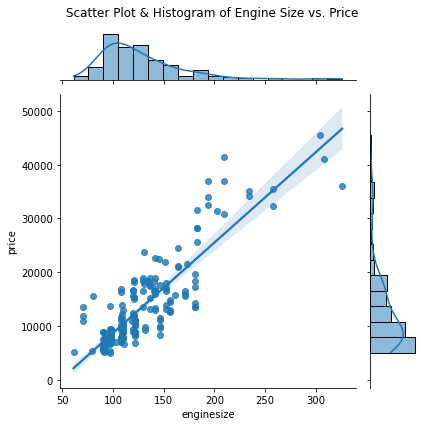

In [10]:
plt.figure(figsize=(12,8))
sns.jointplot(data=df, x='enginesize', y='price', kind='reg').fig.suptitle("Scatter Plot & Histogram of Engine Size vs. Price")
plt.tight_layout()
plt.show()

In [11]:
df_splr = df.copy()

df_splr = df_splr.sample(frac=1).reset_index(drop=True)

df_splr.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,161,0,toyota corona,gas,std,four,sedan,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800,38,47,7738.0
1,11,2,bmw 320i,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430.0
2,198,-1,volvo 245,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0
3,64,0,mazda glc deluxe,diesel,std,four,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795.0
4,109,0,peugeot 304,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.70,3.52,21.0,95,4150,28,33,13200.0


In [12]:
x_splr = df_splr['enginesize']

y_splr = df_splr['price']

In [13]:
# add constant (represent of intercept) to x variable (where y = a + bx)

x_splr = sm.add_constant(x_splr)
x_splr.head()

,const,enginesize
0,1.0,98
1,1.0,108
2,1.0,141
3,1.0,122
4,1.0,152


In [14]:
train_size = int(0.75 * len(x_splr))

x_train_splr = x_splr[:train_size]
y_train_splr = y_splr[:train_size]

x_test_splr = x_splr[train_size:]
y_test_splr = y_splr[train_size:]

In [15]:
x_train_splr.shape, x_test_splr.shape

((153, 2), (52, 2))

In [16]:
model_splr = sm.OLS(y_train_splr, x_train_splr).fit()

model_splr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     415.6
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           3.31e-45
Time:                        11:38:24   Log-Likelihood:                -1492.4
No. Observations:                 153   AIC:                             2989.
Df Residuals:                     151   BIC:                             2995.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8174.6663   1108.067     -7.377      0.000   -1.04e+04   -5985.349
enginesize   170.2075      8.349     20.385      0.000     153.711     186.704
==============================================================================
Omnibus:                       13.855   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.584
Skew:                           0.599   Prob(JB):                     0.000250
Kurtosis:                       4.079   Cond. No.                         434.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model's R-squared is 0.782 or 78.2%, indicating that the linear model is reasonably effective in predicting price, given that it utilizes only one feature. This value signifies that the model captured 78.2% of the variance in the underlying data.

The F-statistic and corresponding P-value evaluate the validity of the regression analysis in its entirety. A P-value less than 5% indicates the analysis's validity. The null hypothesis for this test is that all regression coefficients equal zero, which is not the case in this scenario. Therefore, the null hypothesis can be rejected, and the alternative hypothesis that regression coefficients are not equal to zero can be accepted.

For each regression coefficient, a P-statistic and corresponding P-value quantify the precision and validity of the coefficient. The P-values of 0.000 for the intercept and 0.000 for the enginesize coefficient demonstrate their validity. The T-statistic and P-value confirm the statistical significance of the relationship between enginesize and price.

eval_env: 1


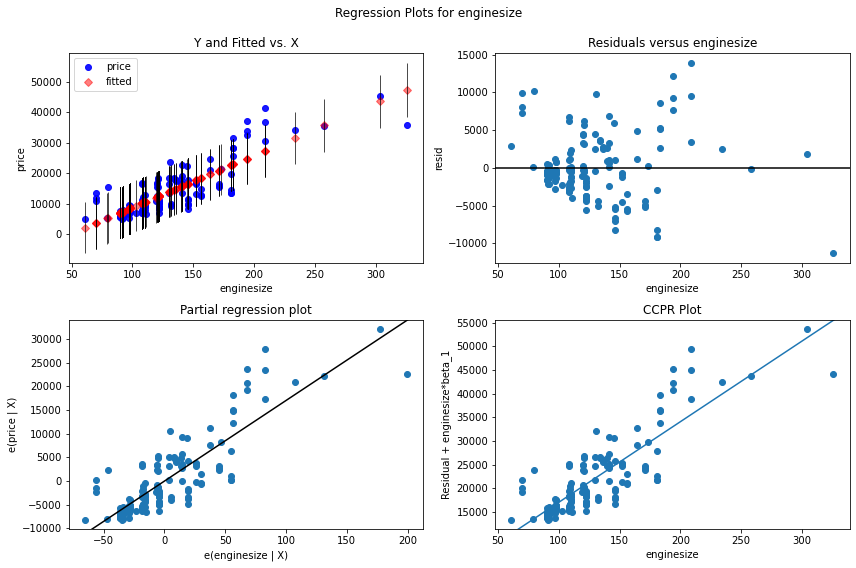

In [17]:
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(model_splr, 'enginesize', fig=fig)

plt.show()

The statsmodels' plot_regress_exog function allows for viewing regression results against a single regressor, which in this case is enginesize. Four different plots are generated by this function:

* The upper-left ('Y and Fitted vs. X') plot displays the fitted values of the regression line (in red) versus the actual values of enginesize and price, with vertical lines representing prediction confidence intervals for each fitted value.
* The second plot, showing the residuals of the regression versus the predictor variable (enginesize), can help identify any non-linear patterns. If residuals are evenly spread out around the 0 line, it indicates that the regression model does not have any non-linear patterns.
* The Partial regression plot is used to demonstrate the effect of adding an independent variable to a model that already has one or more independent variables. As this is a single-variable model, the Partial regression plot simply displays a scatter plot of price versus horsepower with a fitted regression line.
* Lastly, the CCPR (Component-Component Plus Residual) plot allows for assessing the impact of one regressor (enginesize) on the response variable (price) while accounting for the effects of other independent variables. In this case, as there are no other independent variables in this regression, the plot simply shows a scatter plot with a linear model fit on the data.

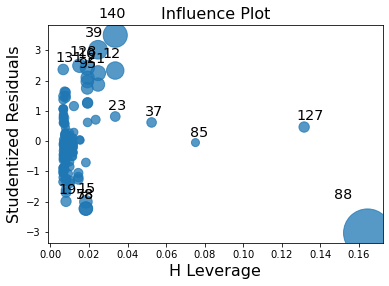

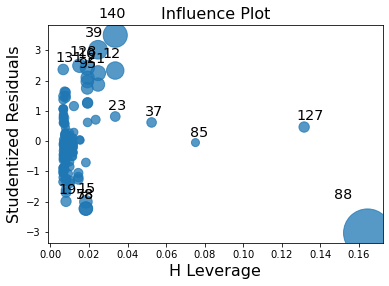

In [18]:
sm.graphics.influence_plot(model_splr)

The influence_plot can be utilized to gain a deeper understanding of the regression model. This plot enables the identification of records in the dataset that have had a significant influence on the regression analysis. The influential data points can be recognized by their large circles in the plot. For instance, the data points with ID 111, 11 and 59 have had a significant impact on the regression results.

In [19]:
y_pred_splr = model_splr.predict(x_test_splr)

y_pred_splr.head()

153    35738.868277
154    14122.515989
155    10377.951026
156    10207.743527
157     7484.423554
dtype: float64

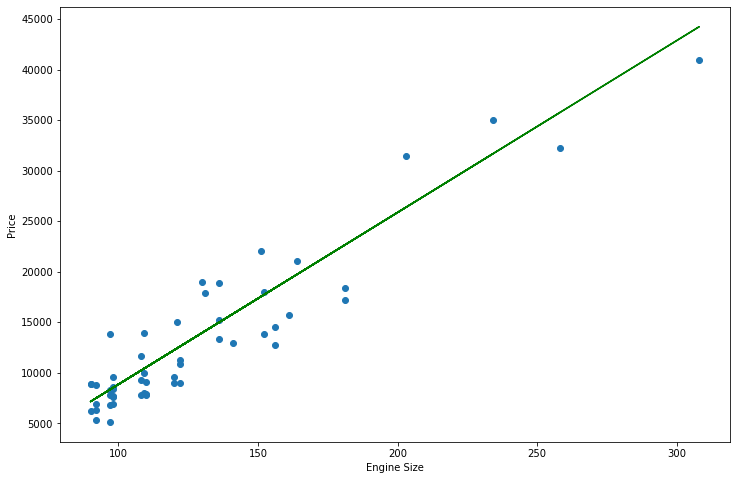

In [20]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(x_test_splr['enginesize'], y_test_splr)
plt.plot(x_test_splr['enginesize'], y_pred_splr, color='g')

plt.xlabel('Engine Size')
plt.ylabel('Price')

plt.show()

Here, I have a scatter plot of the test data, price versus horsepower, and for every x value in the test data, I have the corresponding predicted value that should lie along the line, and here is what the fitted line of the predicted values looks like. It seems to have modeled or fitted on the test data quite well. 

In [83]:
from sklearn.metrics import r2_score

r2_score(y_test_splr, y_pred_splr)

0.8622038573203615

Now, an objective measure of how well our model did on the test data is to compute the r²_score for the test data, and this r² is .69. And the fact that this r² is higher on the test data as compared with the training data, that should tell us that our model generalizes well; it's a good model.

# Multiple Linear Regression

In [22]:
df_mplr = df.copy()
df_mplr.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [23]:
cols = ['fueltype','aspiration','doornumber','enginelocation']

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cols:
    df_mplr[i] = le.fit_transform(df_mplr[i])
    
df_mplr[cols].sample(5)

,fueltype,aspiration,doornumber,enginelocation
184,0,0,0,0
120,1,0,0,0
65,1,0,0,0
3,1,0,0,0
154,1,0,0,0


Many of the predictor columns that we'll use in our regression analysis are categorical in nature, that is, the values in these columns are from a well‑defined subset of values, a pre‑determined subset of values. Columns such as aspiration, door number, engine location, and fuel type have two possible values for each variable. Engine type could be diesel or gas, aspiration could be standard or turbo. Now, these categorical variables need to be converted to numeric form before you can feed these into your analytical or machine learning models. In order to convert these variables to numeric form, we'll use the LabelEncoder from the scikit‑learn library. To every discrete value that these variables take on, the label and quota will assign a unique integral value. For example, gas might be 0, fuel type diesel will be 1. I've run a little for loop here to iterate through each column and convert the value of that column to be in label‑encoded form. Let's take a look at the label‑encoded result. The binary values in each of these variables are now represented using 0 and 1. Before we pre‑process our data further, let's get rid of the car name and car ID columns, because we feel that they do not have predictive power. The name of the car or the ID of the car is not really relevant to our regression analysis, so we'll work with the rest of the data here. 

In [25]:
df_mplr = df_mplr.drop(columns=['CarName', 'car_ID'])

cat_columns = ['carbody', 'enginetype', 'drivewheel', 'cylindernumber', 'fuelsystem']
for i in cat_columns:
    df_mplr = pd.concat([df_mplr.drop(i, axis=1),
                         pd.get_dummies(df_mplr[i],
                                        prefix = i,
                                        prefix_sep = '_',
                                        drop_first = True)], axis=1)

df_mplr.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,1,0,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,1,0,0
3,2,1,0,0,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,1,0,0,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


Now we have a bunch of categorical columns where each column has more than two values. So these are not binary categories. For example, car body here could be one of five different categories, and we've seen that earlier. Now for these categorical columns, I'm going to one‑hot encode these values to represent them in numeric form. One‑hot encoding will replace the original column with a new column, one corresponding to each category value. So we'll have a column for convertible, a column for sedan, a column for hatchback, and so on. A value of 1 will indicate that the car belongs to that category. A value of 0 indicates the car does not belong to a category. Now you can perform one‑hot encoding using pd.get_dummies. Observe that I have dropped the original categorical column using the .drop function, and I replace that column using the set of one‑hot encoded columns for the same variable. Let's take a look at our DataFrame where we've successfully, numerically encoded all of our categorical values. Take a look at the one‑hot encoded columns here. Our original data contained seven possible values for the fuel type variable. Each category is now a separate column in this dataset. All of the records displayed have fuel system equal to MPFI. So we have one in that column. The remaining columns are all 0s. Now that we've performed all of the pre‑processing that we need to on this data, let's just shuffle the data that we'll work with so that the car records are not in any predictable o]rder.

In [26]:
df_mplr.shape

(205, 44)

In [27]:
df_mplr = df_mplr.sample(frac=1).reset_index(drop=True)

In [28]:
x_mplr = df_mplr.drop(['price'], axis=1)

y_mplr = df_mplr['price']

In [29]:
x_mplr = sm.add_constant(x_mplr)

x_mplr.head()

,const,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.0,-1,1,0,0,0,103.3,174.6,64.6,59.8,...,0,0,0,1,0,0,0,0,0,0
1,1.0,0,1,0,0,0,96.5,163.4,64.0,54.5,...,0,0,0,0,0,0,0,0,0,0
2,1.0,2,1,0,1,0,96.1,176.8,66.6,50.5,...,0,0,0,0,0,0,0,1,0,0
3,1.0,1,1,0,1,0,94.5,168.7,64.0,52.6,...,0,0,0,0,0,0,0,1,0,0
4,1.0,0,1,0,0,0,101.2,176.8,64.8,54.3,...,0,0,0,0,0,0,0,1,0,0


In [30]:
train_size = int(0.75 * len(x_mplr))

x_train_mplr = x_mplr[:train_size]
y_train_mplr = y_mplr[:train_size]

x_test_mplr = x_mplr[train_size:]
y_test_mplr = y_mplr[train_size:]

In [31]:
model_mplr = sm.OLS(y_train_mplr, x_train_mplr).fit()

model_mplr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     53.33
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           9.22e-57
Time:                        11:38:26   Log-Likelihood:                -1368.2
No. Observations:                 153   AIC:                             2814.
Df Residuals:                     114   BIC:                             2933.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.813e+04   1.21e+04     -1.498      0.137   -4.21e+04    5844.178
symboling               172.0280    273.819      0.628      0.531    -370.405     714.461
fueltype               -1.64e+04   6039.383     -2.716      0.008   -2.84e+04   -4438.981
aspiration             1385.9448    997.520      1.389      0.167    -590.136    3362.025
doornumber              487.8385    688.546      0.709      0.480    -876.165    1851.842
enginelocation         9997.8858   2804.876      3.564      0.001    4441.447    1.56e+04
wheelbase                -4.7337    108.505     -0.044      0.965    -219.682     210.214
carlength               -53.8651     59.353     -0.908      0.366    -171.442      63.712
carwidth                678.3596    305.540      2.220      0.028      73.088    1283.631
carheight                28.6386    143.895      0.199      0.843    -256.416     313.693
curbweight                6.2227      2.365      2.631      0.010       1.538      10.907
enginesize               92.7399     30.930      2.998      0.003      31.468     154.012
boreratio              1454.0275   2053.375      0.708      0.480   -2613.693    5521.748
stroke                -5302.2881   1082.562     -4.898      0.000   -7446.835   -3157.741
compressionratio      -1007.0745    603.705     -1.668      0.098   -2203.009     188.860
horsepower              -17.8256     24.613     -0.724      0.470     -66.583      30.932
peakrpm                   2.8648      0.702      4.079      0.000       1.473       4.256
citympg                 -59.3763    167.252     -0.355      0.723    -390.701     271.948
highwaympg              103.8597    152.273      0.682      0.497    -197.792     405.511
carbody_hardtop       -4281.1716   1518.983     -2.818      0.006   -7290.265   -1272.078
carbody_hatchback     -3154.2565   1351.642     -2.334      0.021   -5831.849    -476.664
carbody_sedan         -1588.5682   1492.940     -1.064      0.290   -4546.071    1368.935
carbody_wagon         -2989.3871   1634.535     -1.829      0.070   -6227.388     248.614
enginetype_dohcv      -4532.3016   5386.570     -0.841      0.402   -1.52e+04    6138.453
enginetype_l           -700.8239   1791.733     -0.391      0.696   -4250.234    2848.586
enginetype_ohc         4430.9145   1018.589      4.350      0.000    2413.098    6448.731
enginetype_ohcf         384.4982   1916.247      0.201      0.841   -3411.573    4180.569
enginetype_ohcv       -5988.9966   1613.561     -3.712      0.000   -9185.449   -2792.545
enginetype_rotor       -820.3427   2581.993     -0.318      0.751   -5935.251    4294.565
drivewheel_fwd          179.0951   1123.233      0.159      0.874   -2046.020    2404.210
drivewheel_rwd          753.5939   1418.737      0.531      0.596   -2056.913    3564.101
cylindernumber_five   -

The first thing that ought to jump out at you is that our R‑squared has jumped to 0.939 or 93.9%. But with multiple regression, it's important that we look at the Adjusted R‑squared as well, and that's 92.1%. When you use multiple predictors, not all of your predictors might be relevant. The Adjusted R‑squared applies a penalty to the irrelevant variables you may have used in your regression analysis. The fact that the Adjusted R‑squared here is very close to the R‑squared indicates that we have very few irrelevant variables in our regression. Here is the F‑statistic and the corresponding p‑value for the regression analysis as a whole. This very small p‑value under the significant threshold of 5% indicates that our regression analysis, on the whole, is valid. The coefficients of the regression are non zero. Each of the 44 predictors in our model will have a corresponding regression coefficient and with every regression coefficient, we have a t statistic and the p‑value giving us the validity of that regression coefficient. Observe that the p‑value corresponding to the enginesize coefficient is 0. The null hypothesis for this statistical test is that this coefficient has no impact or effect on the regression. The alternative hypothesis is that this coefficient has an impact or effect on the regression. With the p‑value of 0, we accept the alternative hypothesis. Observe the p‑value for the citympg. The p‑value is 78%, which is far above our significance threshold of 5%. This means that this particular variable or this coefficient does not have an effect on our regression, it's an irrelevant predictor. 

In [32]:
y_pred_mplr = model_mplr.predict(x_test_mplr)

y_pred_mplr.head()

153    15787.456414
154    17991.767373
155    16425.666092
156     6705.126907
157     8847.828593
dtype: float64

In [33]:
from sklearn.metrics import r2_score

r2_score(y_test_mplr, y_pred_mplr)

0.8728138341281525

Now that we have our trained regression model, all that's left is to evaluate this model on the test data. Invoke predict on the test set, and here are the price predictions from our test data. Let's compute the R‑squared code on the test data and we get an R‑square of 81.8%. This is a pretty good R‑square. It shows us that our linear model with multiple predictors captures the variants in the underlying data points well. 

In [34]:
data_actual_pred = pd.DataFrame({'Actual Value' : y_test_mplr.ravel(),
                                 'Predicted Value' : y_pred_mplr})

data_actual_pred.head()

,Actual Value,Predicted Value
153,13499.0,15787.456414
154,15580.0,17991.767373
155,12964.0,16425.666092
156,7603.0,6705.126907
157,10295.0,8847.828593


In [85]:
melted_data_actual_pred = pd.melt(data_actual_pred.reset_index(),
                                   id_vars=['index'],
                                   value_vars=['Actual Value', 'Predicted Value'])

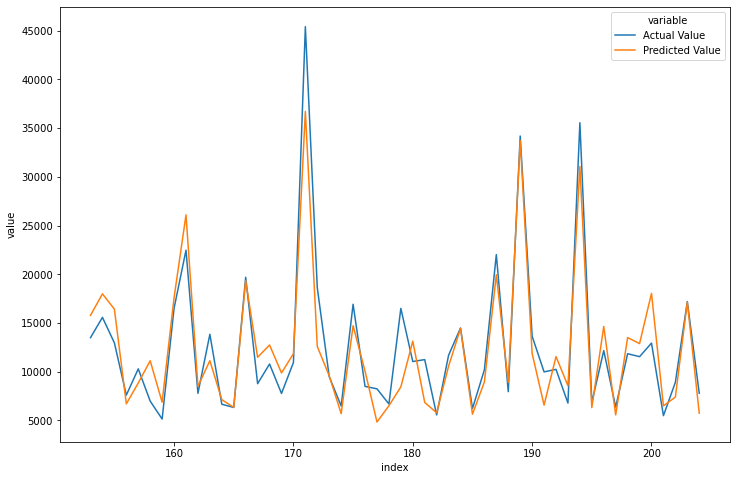

In [86]:
plt.figure(figsize=(12,8))
sns.lineplot(data=melted_data_actual_pred, x='index', y='value', hue='variable')

plt.show()

In order to visualize the actual value in the test set versus predicted values, let's set up a data frame with two columns, Actual Value and Predicted Value from our model. The values seem pretty close, but here is a line plot that will allow us to visualize this. A line plot of predicted values and a line plot of actual values overlaid one on top of the other. And you can see from the way the plot moves that the values are actually close. The predicted values from our model are close to the actual values in the test data.